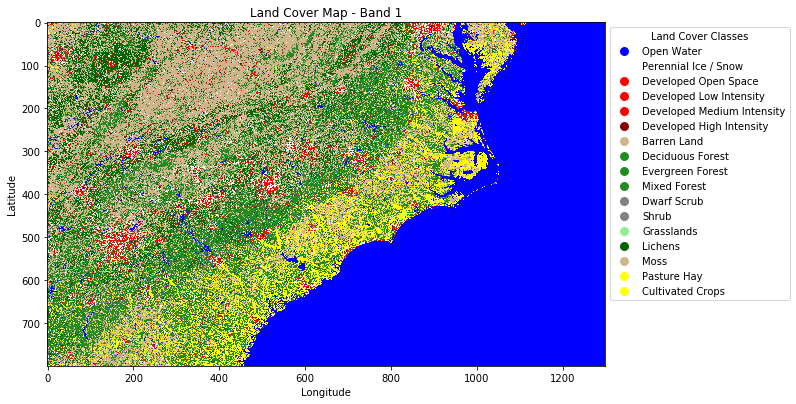

In [22]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Mapping from the CSV data (value -> name)
value_to_name = {
    11: "Open Water",
    12: "Perennial Ice / Snow",
    21: "Developed Open Space",
    22: "Developed Low Intensity",
    23: "Developed Medium Intensity",
    24: "Developed High Intensity",
    31: "Barren Land",
    41: "Deciduous Forest",
    42: "Evergreen Forest",
    43: "Mixed Forest",
    51: "Dwarf Scrub",
    52: "Shrub",  # Assuming 'test' is a placeholder, adjust as needed
    71: "Grasslands",  # Same here
    73: "Lichens",
    74: "Moss",
    81: "Pasture Hay",
    82: "Cultivated Crops",
    90: "Woody Wetlands",
    95: "Herbaceous Wetlands"
}

# Color list corresponding to each land cover class
colors = [
    'blue', 'white', 'red', 'red', 'red', 'darkred', 'tan',
    'forestgreen', 'forestgreen', 'forestgreen', 'gray', 'gray', 'lightgreen',
    'darkgreen', 'tan', 'yellow', 'yellow'
]

# Open the .tif file
file_path = "/shared_space/ACV/nlcd_nc0.1.tif"
with rasterio.open(file_path) as src:
    # Read the first band
    band1 = src.read(1)

    # Create a custom colormap and normalize based on the unique values in the band
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(boundaries=list(value_to_name.keys()) + [max(value_to_name.keys()) + 1], ncolors=len(colors))

    # Plot the band with custom colormap
    plt.figure(figsize=(10, 8))
    plt.imshow(band1, cmap=cmap, norm=norm)

    plt.title("Land Cover Map - Band 1")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Create a legend for the values and names
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
    labels = [value_to_name[val] for val in sorted(value_to_name.keys())]
    plt.legend(handles, labels, title="Land Cover Classes", loc="upper left", bbox_to_anchor=(1, 1))


    plt.show()


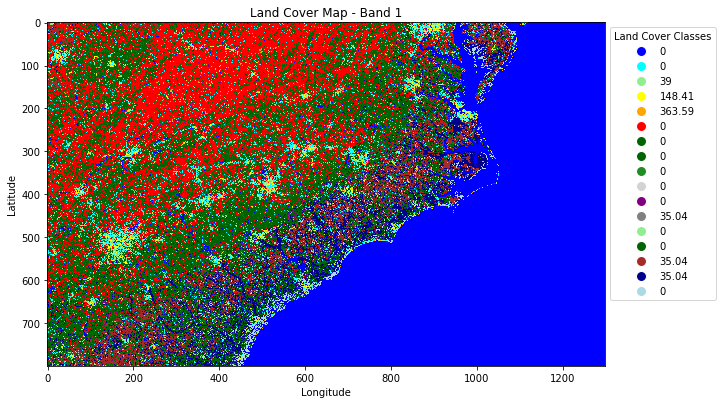

In [5]:

# Mapping from the CSV data (value -> name)
value_to_name = {
    11: "0",
    12: "0",
    21: "39",
    22: "148.41",
    23: "363.59",
    31: "0",
    41: "0",
    42: "0",
    43: "0",
    51: "0",
    52: "0",  # Assuming 'test' is a placeholder, adjust as needed
    71: "35.04",  # Same here
    73: "0",
    74: "0",
    81: "35.04",
    82: "35.04",
    90: "0",
    95: "35.04"
}

# Color list corresponding to each land cover class
colors = [
    'blue', 'cyan', 'lightgreen', 'yellow', 'orange', 'red', 'darkgreen',
    'darkgreen', 'forestgreen', 'lightgray', 'purple', 'gray', 'lightgreen',
    'darkgreen', 'brown', 'darkblue', 'lightblue'
]

# Open the .tif file
file_path = "/shared_space/ACV/nlcd_nc0.1.tif"
with rasterio.open(file_path) as src:
    # Read the first band
    band1 = src.read(1)

    # Create a custom colormap and normalize based on the unique values in the band
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(boundaries=list(value_to_name.keys()) + [max(value_to_name.keys()) + 1], ncolors=len(colors))

    # Plot the band with custom colormap
    plt.figure(figsize=(10, 8))
    plt.imshow(band1, cmap=cmap, norm=norm)

    plt.title("Land Cover Map - Band 1")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Create a legend for the values and names
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
    labels = [value_to_name[val] for val in sorted(value_to_name.keys())]
    plt.legend(handles, labels, title="Land Cover Classes", loc="upper left", bbox_to_anchor=(1, 1))


    plt.show()


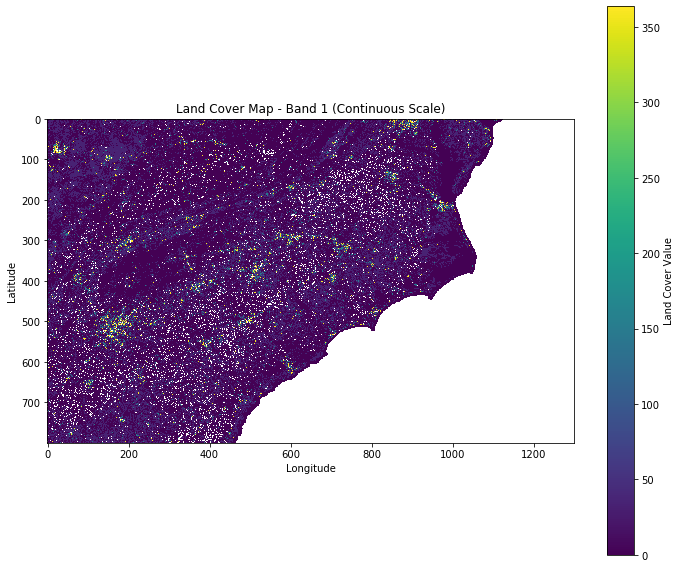

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm

# Mapping from the CSV data (value -> numeric value)
value_to_value = {
    11: 0.0,
    12: 0.0,
    21: 39.0,
    22: 148.41,
    23: 363.59,
    31: 0.0,
    41: 0.0,
    42: 0.0,
    43: 0.0,
    51: 0.0,
    52: 0.0,  
    71: 35.04,
    73: 0.0,
    74: 0.0,
    81: 35.04,
    82: 35.04,
    90: 0.0,
    95: 35.04
}

# Open the .tif file
file_path = "/shared_space/ACV/nlcd_nc0.1.tif"
with rasterio.open(file_path) as src:
    # Read the first band
    band1 = src.read(1)

    # Map the band values to their corresponding numeric values
    band_values = np.vectorize(lambda x: value_to_value.get(x, np.nan))(band1)

    # Set up the colormap and normalization for continuous values
    norm = Normalize(vmin=np.nanmin(band_values), vmax=np.nanmax(band_values))
    cmap = cm.viridis  

    # Plot the band with the continuous colormap
    plt.figure(figsize=(10, 8))
    plt.imshow(band_values, cmap=cmap, norm=norm)
    cbar = plt.colorbar(label="Value")
    plt.title("Land Cover Map - Band 1 (Continuous Scale)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Create a continuous legend using the colorbar
    cbar.set_label("Land Cover Value")

    # Adjust plot layout to ensure the colorbar fits well
    plt.tight_layout()

    plt.show()
